# Exploring 3D Sinusoidal Data using Artificial Neural Networks
## DTSC 680: Applied Machine Learning

## Name: Estrella Arellano

## Directions and Overview

The main purpose of this assignment is for you to gain experience using artificial neural networks to solve simple regression problems.  In this assignment, you will fit a neural network to a noisy 3D sinusoidal data set.  You will use a `Sequential` model that can be trained very quickly on the supplied data, so I want you to manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the reasonable hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

So, play around and build some models.  When you are done playing with hyperparameter values, you should finish by building an ANN that models the data reasonably well! You should be able to train a model and use it to predict a curve at least as good as mine, but your goal should be to obtain a smoother and less erratic curve.

(Side Note: Achieving a less erratic prediction curve could be done either by building a better model, ___OR___ by sorting the data more intelligently thereby plotting a prediction curve that looks better.  I propose the ideal line is created by sorting the data in such a way that the resulting line minimizes the arc length of the curve. You don't need to worry about any of this, however you do need to generate a figure with a descent-looking prediction curve superimposed on the data.)

Here just just a few of the hyperparameters you can play around with:

- number of nodes per layer
- number of layers
- activation functions
- normalization method (should be negligible)
- number of epochs
- learning rate
- loss function

You will know that you have obtained a reasonable model when the model's prediction curve looks reasonable.  ___Below you will be asked to plot the model's prediction curve along with the training data.  Even if you correctly train the model, you may find that your trendline looks totally crazy and out-of-this-world when you first plot it.  If this happens to you, try plotting the model's predictions using a scatter plot rather than a connected line plot.  You should be able to infer the problem and solution with plotting the trendline from examining this new scatter plot of the model's predictions.  Your final submission, however, should contain a connected line plot.___  

Lastly in this assignment, you will compute the generalization error on the test set.

## Preliminaries

Let's import some common packages:

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(data_df):
    # split df into: X, Y, Z 
    x = X_train_scaled[:, 0]
    z = X_train_scaled[:, 1]
    y = y_train_scaled
    
    # creating a figure that is 18 by 12
    fig = plt.figure(figsize=[18, 12])
    
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

    # 4 subplots
    viewing_angles = [(0, -270), (45, 0), (45, 90), (-270, 90)]
    for i, angle in enumerate(viewing_angles):
        # setting up the axes for each plot
        ax = fig.add_subplot(2, 2, i + 1, projection='3d')
        # setting the view angle for the subplot
        ax.view_init(angle[0], angle[1])
        # implementing ax.scatter3D
        ax.scatter3D(x, y, z)
        # setting the labels for the subplots
        ax.set_xlabel('x', fontdict=font)
        ax.set_ylabel('y', fontdict=font)
        ax.set_zlabel('z', fontdict=font)
        ax.set_xlim(-1.75, 1.75)
        ax.set_ylim(-1.95, 1.6)
        ax.set_zlim(-1.75, 1.75)
        plt.tight_layout(pad=0.0, w_pad=0.05, h_pad=0.0)
        
    plt.show()
    
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    fig = plt.figure(figsize=[18, 12])
    
    font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 14,
            }
    
    viewing_angles = [(0, -270), (45, 0), (45, 90), (-270, 90)]
    
    for i, angle in enumerate(viewing_angles):
        ax = fig.add_subplot(2, 2, i + 1, projection='3d')
        ax.view_init(angle[0], angle[1])
        ax.scatter3D(scat_x, scat_y, scat_z)
        ax.plot3D(fit_x, fit_y, fit_z, color='black')
        ax.set_xlabel('x', fontdict=font)
        ax.set_ylabel('y', fontdict=font)
        ax.set_zlabel('z', fontdict=font)
        ax.set_xlim(-1.75, 1.75)
        ax.set_ylim(-1.95, 1.6)
        ax.set_zlim(-1.75, 1.75)
        plt.tight_layout(pad=0.0, w_pad=0.05, h_pad=0.0)
        
    plt.show()

# Import, Split and Standardize Data

Complete the following:



1. Begin by importing the data from the file called `3DSinusoidalANN.csv`.  Name the returned DataFrame `data`.

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. Looking at the below graph, it makes sense for `x` and `z` to be your training data and `y` to be your response data.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).

3. Next, use the `StandardScaler()` to scale your data.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importing data from csv into dataframe
data = pd.read_csv('3DSinusoidalANN.csv')

# defining the features and targets
X = data[['x','z']]
y = data['y']

# splitting the data into features and response variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# creating an instance of StandardScaler
scaler = StandardScaler()

# fitting the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# creating a scaler for y response data
y_scaler = StandardScaler()

# fitting the scaler on the y_training data and transforming the test data to 1D array
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Plot Data

Simply plot your training data here, so that you know what you are working with.  You must define a function called `plot3Ddata`, which accepts a Pandas DataFrame (composed of 3 spatial coordinates) and uses `scatter3D()` to plot the data.  Use this function to plot only the training data (recall that you don't even want to look at the test set, until you are ready to calculate the generalization error).  You must place the definition of this function in the existing code cell of the above __Preliminaries__ section, and have nothing other than the function invocation in the below cell. 

You must emulate the graphs shown in the respective sections below. Each of the graphs will have four subplots. Note the various viewing angles that each subplot presents - you can achieve this with the view_init() method. Be sure to label your axes as shown.

In [3]:
# converting X_train_scaled to a DataFrame to be able to concat with y_train
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['x', 'z'])

# converting y_train_scaled to a DataFrame or Series
y_train_scaled_df = pd.DataFrame(y_train_scaled, columns=['y'])

# combining scaled features and scaled target into a single df for plotting 
train_df = pd.concat([X_train_scaled_df, y_train_scaled_df], axis=1)

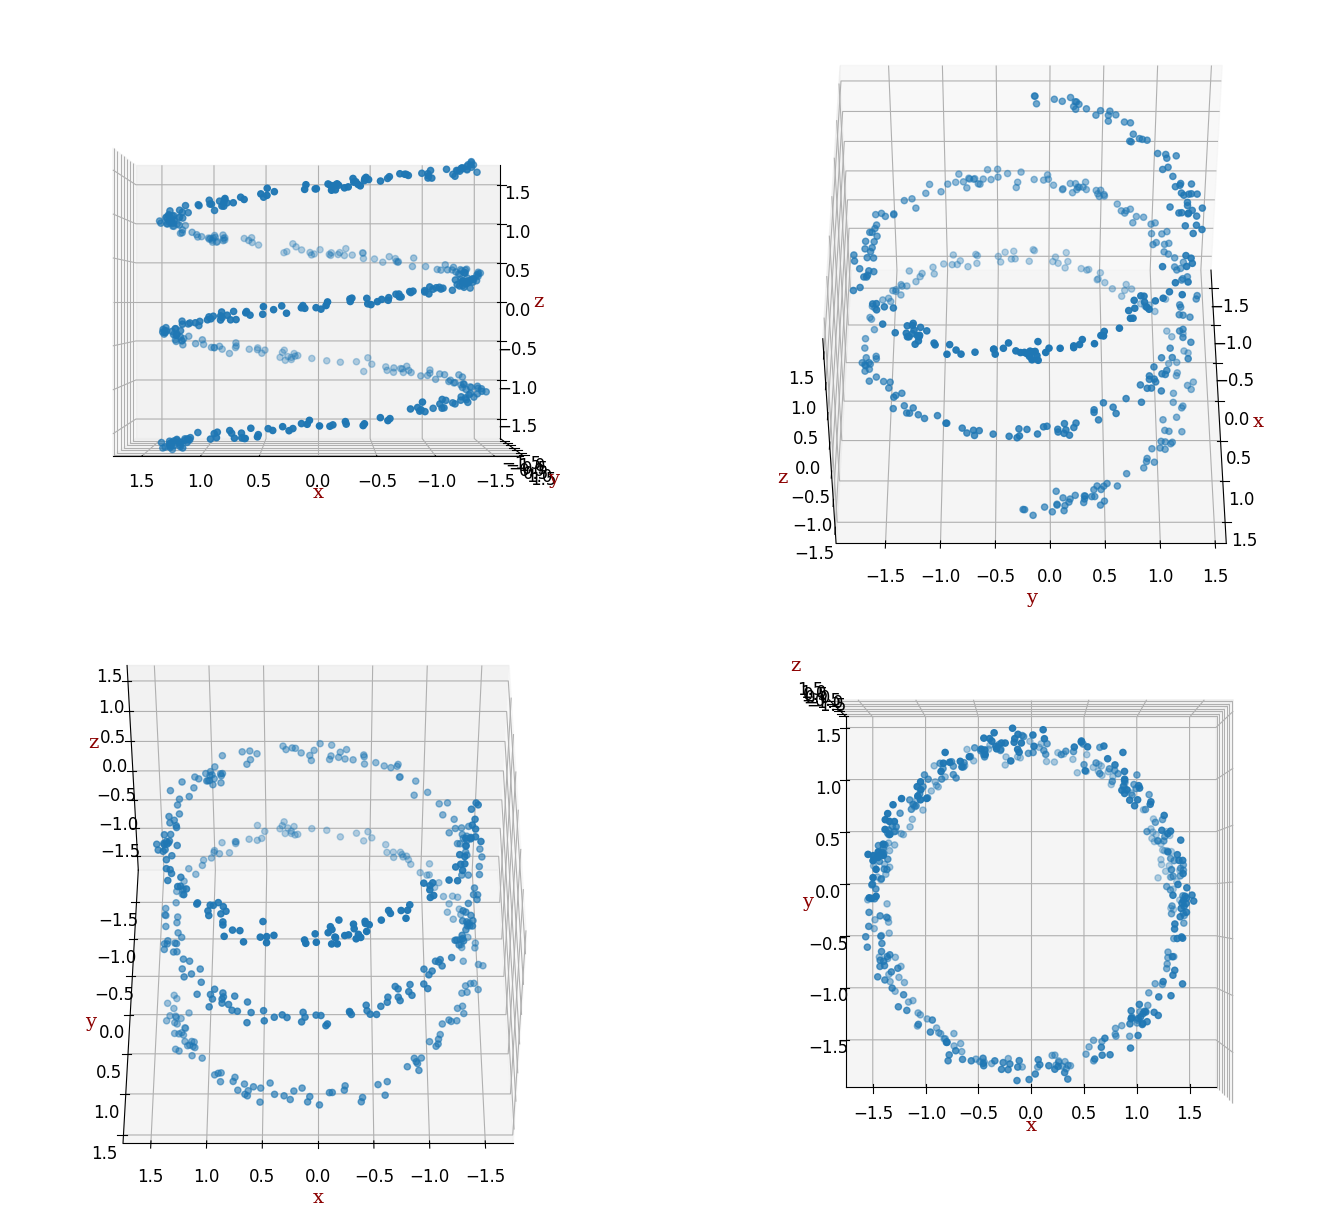

In [4]:
plot3Ddata(train_df)

## A Quick Note

In the following sections you will be asked to plot the training data along with the model's predictions for that data superimposed on it.  You must write a function called `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` that will plot this figure.  The function accepts six parameters as input, shown in the function signature.  All six input parameters must be NumPy arrays.  The three Numpy arrays called `fit_x, fit_y,` and  `fit_z` represent the x, y, and z coordinates of the model predictions (i.e. the prediction curve).  The three Numpy arrays called `scat_x, scat_y,` and  `scat_z` represent the x, y, and z coordinates of the training data.   

You must place the definition of the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function in the existing code cell of the above __Preliminaries__ section. (The function header is already there - you must complete the function definition.)  You will use the `plotscatter3Ddata()` function in the following section.

# Explore 3D Sinusoidal Data with Artifical Neural Networks

Fit a `Sequential` model to this data.  You must manually assign values to the hyperparameters, including the number of nuerons per layer and the number of layers.  You should "play around" by using different combinations of hyperparameter values.  When you are done playing, you should build an ANN that models the data well.  Then, you will use that modelto calculate the generalization error in the subsequent section.

Values "played around with":
 - `number of nodes per layer = <40,20,50,5,30,10,15>`
 - `number of layers = <1,2,3>`
 - `optimizer = <SGD,Adam>`
 - `activation = <relu,selu>`
 - `number of epochs = <100,200,250>`
 - `learning rate = <0.1,0.01,0.001,0.2,0.02>`

### Plot Model Predictions for Training Set

Use the model's `predict()` method to make a prediction for `y` using the `x` and `z` training data.  Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import MeanSquaredError
from keras.optimizers import Adam

np.random.seed(42)
tf.random.set_seed(42)

# creating a sequential model to the scaled data
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(40, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])  # building layers

model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.02)) # compiling model

history = model.fit(X_train_scaled, y_train_scaled, epochs=200) # fitting training data to sequential model

Epoch 1/200


C:\Users\mikea\Estrella Arellano\DataScience680_Applied_Machine_Learning\Assignment_1_virt_env\assign_1\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9434
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8584 
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7421 
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6859 
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5413 
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2416 
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1609 
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0762 
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1005 
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0791 
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - loss: 0.0553
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0784 
Epoch 13/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0529 
Epoch 14/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0633 
Epoch 15/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0516 
E

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0275 
Epoch 161/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0293 
Epoch 162/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.0404
Epoch 163/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0360 
Epoch 164/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0347 
Epoch 165/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0309 
Epoch 166/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0299 
Epoch 167/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0310 
Epoch 168/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0281 
Epoch 169/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 0.0268
Epoch 170/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0348 
Epoch 171/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0314 
Epoch 172/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0356 
Epoch 173/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0336 
Epoch 174/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


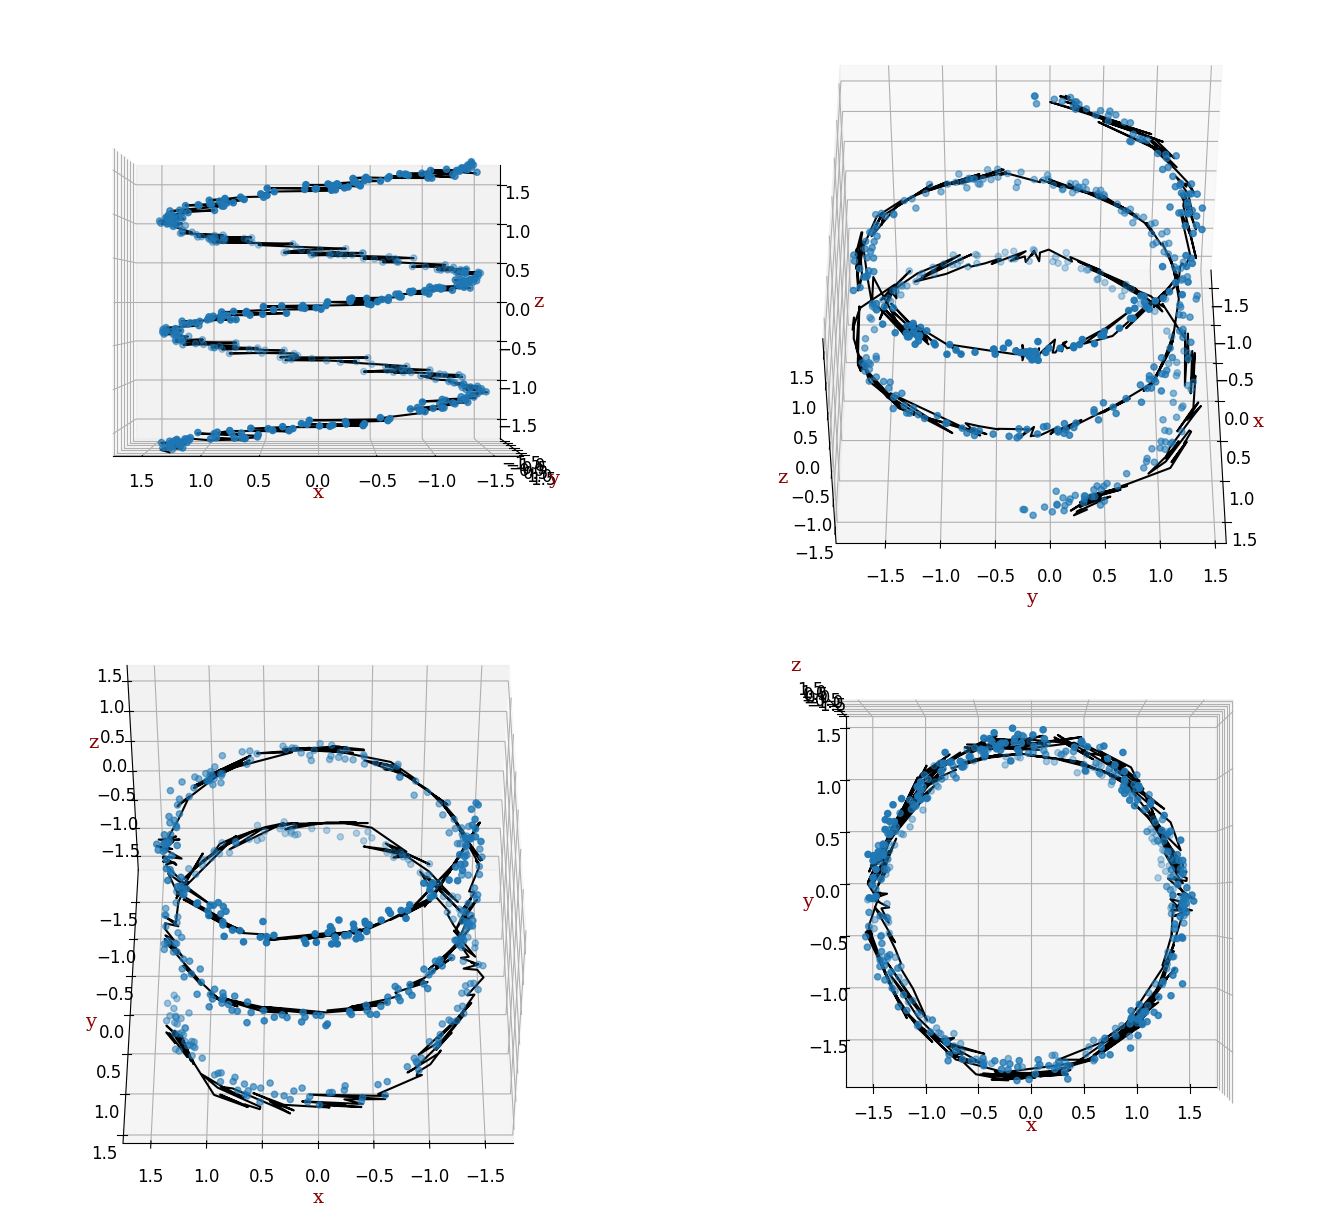

In [6]:
# predicting y-training data
y_pred = model.predict(X_train_scaled)

# defining scatterplot variables/coordinates
scat_x = X_train_scaled[:, 0]
scat_z = X_train_scaled[:, 1]
scat_y = y_train_scaled


# data for fitting a 3D line as prediction curve(fit_y)
fit_x = scat_x
fit_z = scat_z
fit_y = y_pred.flatten() # The predicted y values

# sorting the coordinates based on fit_x and fit_z
sorted_indices = np.lexsort((fit_x, fit_z))
fit_x_sorted = fit_x[sorted_indices]
fit_z_sorted = fit_z[sorted_indices]
fit_y_sorted = fit_y[sorted_indices]

# calling the function to plot the 3D scatterplot with the prediction curve
plotscatter3Ddata(fit_x_sorted, fit_y_sorted, fit_z_sorted, scat_x, scat_y, scat_z)

# Compute Generalization Error

Compute the generalization error and use MSE as the generalization error metric.  Round your answers to four decimal places.  Print the generalization error for the model.

In [7]:
from sklearn.metrics import mean_squared_error

# predicting test data
y_pred_test = model.predict(X_test_scaled)

# calculating the generalization error using MSE on the test set
mse = mean_squared_error(y_test_scaled, y_pred_test)
print(f'MSE Generalization error for test set = {mse:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
MSE Generalization error for test set = 0.0264
